### Task 1: Import Libraries
---

In [1]:
# REPORT GENERATE KRNE KE LIYE
#-u is used for latest version
pip install -U pandas-profiling


Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.5.0)


In [2]:
pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.1)


In [0]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [0]:
plt.rcParams['figure.figsize'] = (12,8)

### Task 2: Exploratory Data Analysis
---

In [5]:
#data google colab mein imported hai
hr = pd.read_csv("/content/employee_data.csv")
# head first few entries dikha dega
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#data ki description
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# overview report of data 
file = hr.profile_report(title="Data Report")

In [0]:
#html mein download krne ke liye.
file.to_file(output_file="Employee Data Report.html")

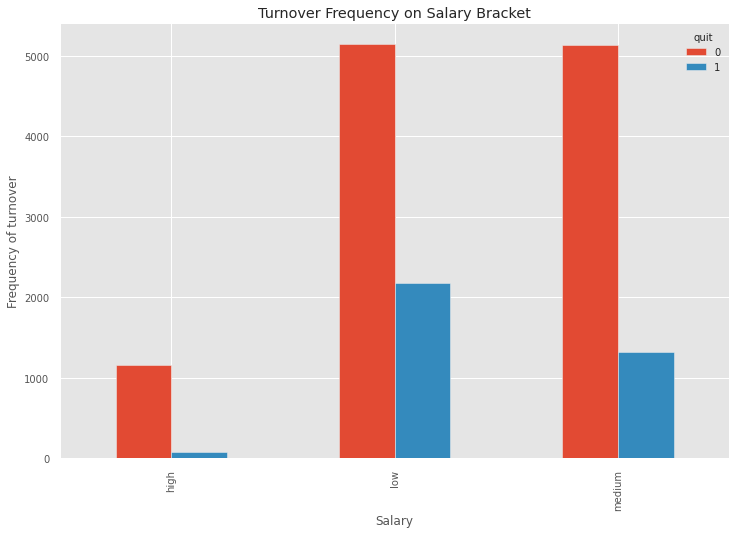

In [9]:
pd.crosstab(hr.salary,hr.quit).plot(kind="bar") #pehla salary x axis dusra y axis , kind mein ayega kaisa graph chahiye
plt.title("Turnover Frequency on Salary Bracket")
plt.xlabel("Salary")
plt.ylabel("Frequency of turnover")
plt.show()

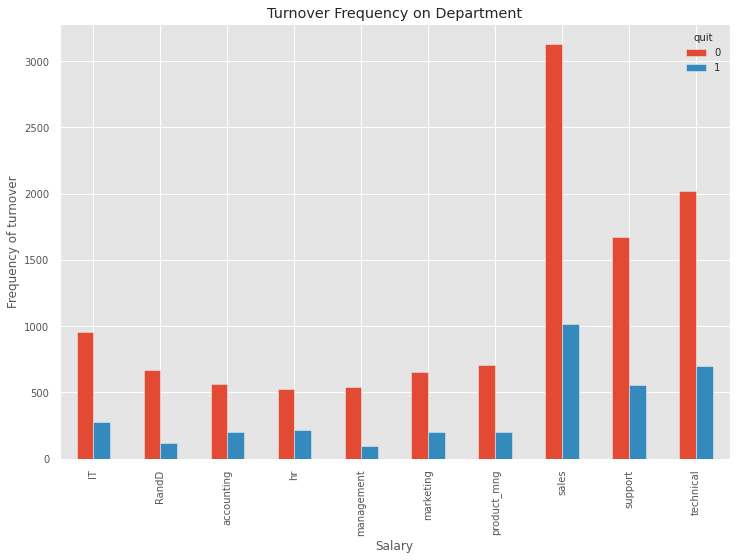

In [10]:
pd.crosstab(hr.department,hr.quit).plot(kind="bar") #pehla department x axis dusra y axis , kind mein ayega kaisa graph chahiye
plt.title("Turnover Frequency on Department")
plt.xlabel("Salary")
plt.ylabel("Frequency of turnover")
plt.show()

### Task 3: Encode Categorical Features
---

In [0]:
category_variables = ['department','salary']
for var in category_variables:
  category_list=pd.get_dummies(hr[var],prefix=var)
  hr=hr.join(category_list)

In [12]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
#ab hum salary aur department table delete krenge coz values ab humne one hot encode krdi matlab alag column bna diye hain
hr.drop(columns=['department','salary'],axis=1,inplace=True)


In [14]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Task 4: Visualize Class Imbalance
---

In [0]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

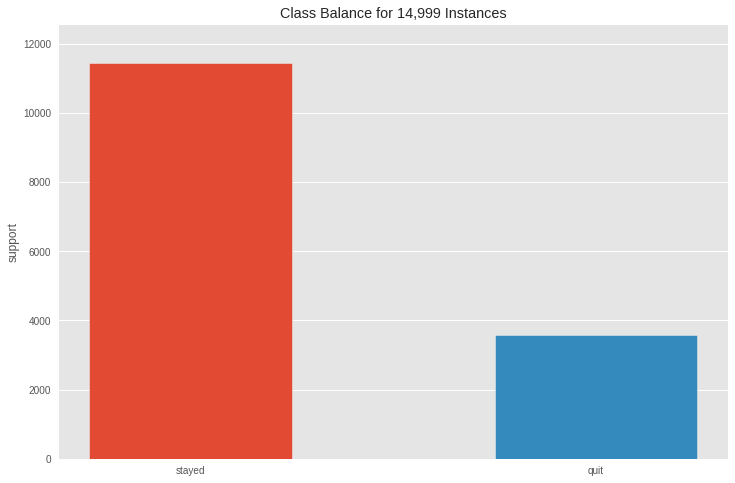

In [16]:
visualizer= ClassBalance(labels=["stayed","quit"])
visualizer.fit(hr.quit)
visualizer.poof()

### Task 5: Create Training and Test Sets
---

In [0]:
X = hr.loc[:,hr.columns != "quit"]
y=hr.quit

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)

### Task 6 & 7: Build an Interactive Decision Tree Classifier
---

Supervised learning: 
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$

- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$

About:
 
 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption
 
- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.

#### Decision trees: partitioning the feature space:



- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem in Task 8.

In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [20]:
@interact
def plot_tree(crit=["gini","entropy"],
              split=["best","random"],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
  estimator = DecisionTreeClassifier(random_state=0,
                                      criterion=crit,
                                      splitter=split,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf)
  estimator.fit(X_train,y_train)
  print("Decision Tree training accuracy = {:.3f}".format(accuracy_score(y_train,estimator.predict(X_train))))
  print("Decision Tree testing accuracy = {:.3f}".format(accuracy_score(y_test,estimator.predict(X_test))))


  graph = Source(tree.export_graphviz(estimator,
                                      out_file=None,
                                      feature_names=X_train.columns,
                                      class_names=["Stayed","Quit"],
                                      filled=True))

  display(Image(data=graph.pipe(format="png")))
  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 8: Build an Interactive Random Forest Classifier
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [21]:
@interact
def plot_tree_rf(crit=["gini","entropy"],
                 bootstrap=["true","false"],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
  estimator=RandomForestClassifier(criterion=crit,
                                   bootstrap=bootstrap,
                                   max_depth=depth,
                                   n_estimators=forests,
                                   min_samples_split=min_split,
                                   min_samples_leaf=min_leaf,
                                   verbose=False,
                                   n_jobs=-1)
  #verbose use hota hai agr debug information print krwani ho screen pr
    #this sckit learn's random forest estimator is it is paralyzable so we can exploit all our cpu coressolely for our computation hence n_jobs=-1
  estimator.fit(X_train,y_train)  
  print("Random Forest Classifier training accuracy = {:.3f}".format(accuracy_score(y_train,estimator.predict(X_train))))
  print("Random Forest Classifier testing accuracy = {:.3f}".format(accuracy_score(y_test,estimator.predict(X_test))))
  num_tree = estimator.estimators_[0]#bahut saare trees bnte hai so this says ki sirf pehla tree hi show krna vrna sab cluttered view ayega
  print("Visualizing Tree Number:",0)
  graph = Source(tree.export_graphviz(num_tree,
                                      out_file=None,
                                      feature_names=X_train.columns,
                                      class_names=["Stayed","Quit"],
                                      filled=True))

  display(Image(data=graph.pipe(format="png")))
  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 9: Feature Importance and Evaluation Metrics
---

In [0]:
from yellowbrick.model_selection.importances import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

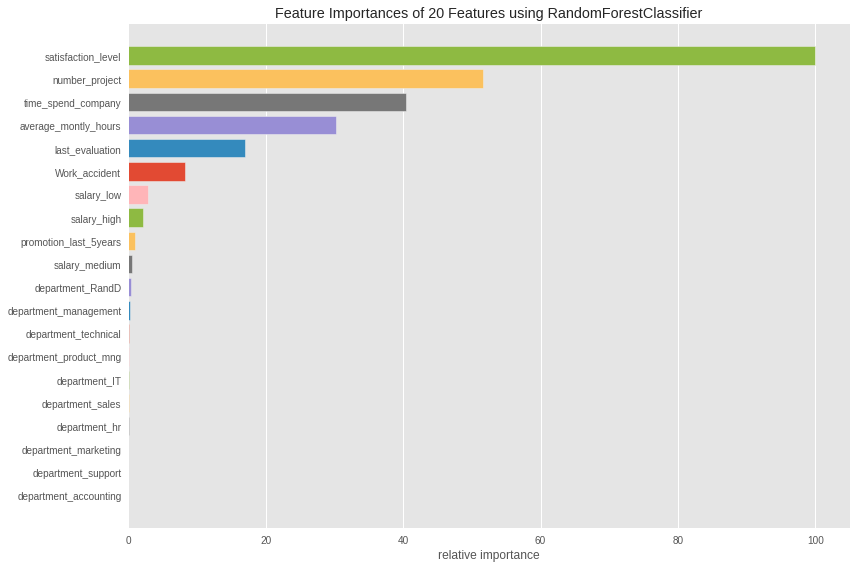

In [27]:
rf = RandomForestClassifier(bootstrap='true', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None,
                       verbose=False, warm_start=False)#copy returned estimator from above random forest code
viz = FeatureImportances(rf) #visualizer
viz.fit(X_train,y_train)
viz.show()

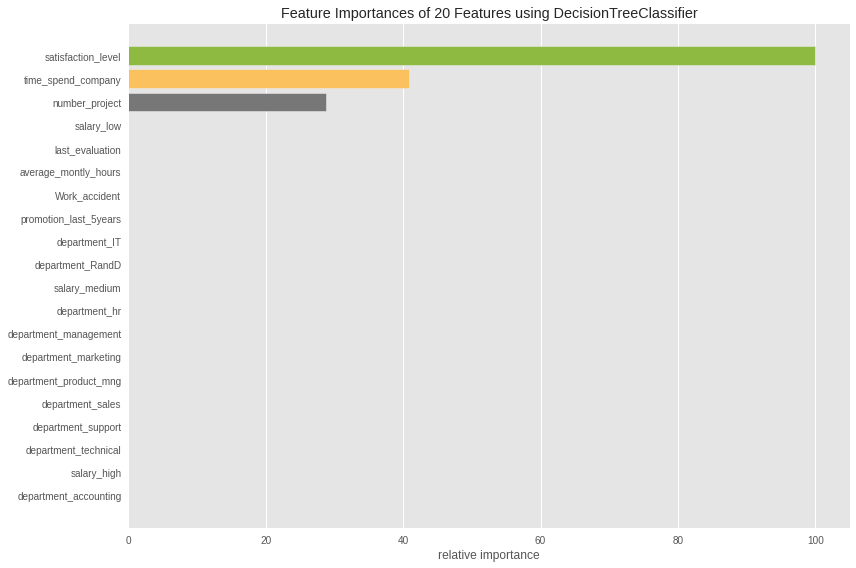

In [29]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')#copy returned estimator from above decision tree code
viz = FeatureImportances(dt) #visualizer
viz.fit(X_train,y_train)
viz.show()

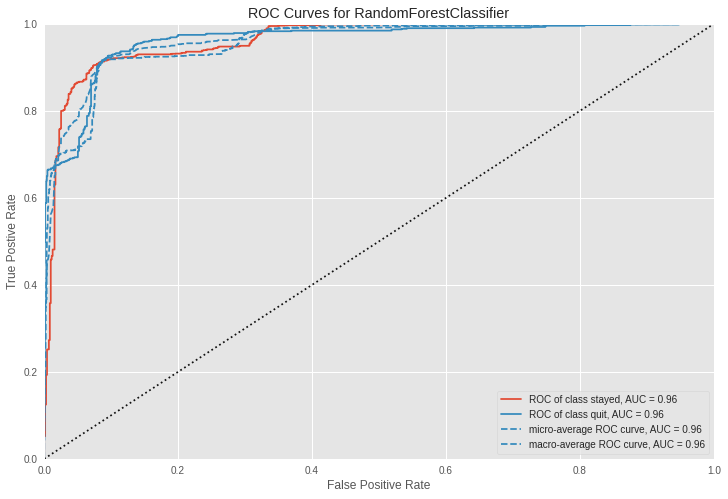

In [30]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf,classes=["stayed","quit"])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

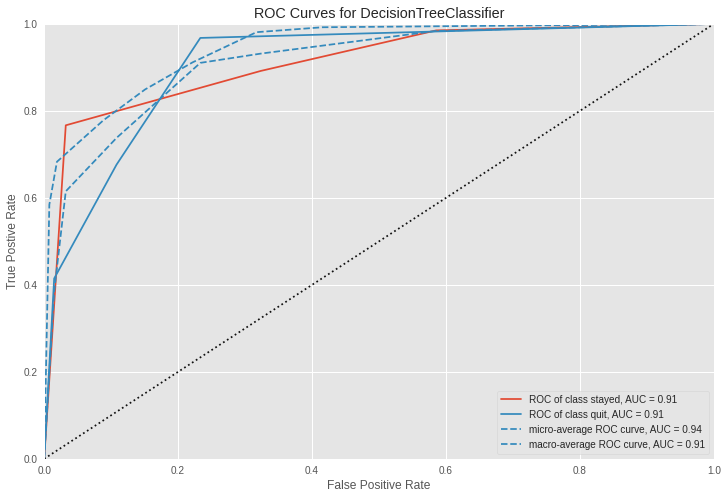

In [31]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(dt,classes=["stayed","quit"])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()